# Extract and compare DEM elevation with ICESat-2 Points
1. Merge DEMs strips is more than 1
2. Extract Elevation for DEM
3. Note Time and Time difference between acquisition of ICESat-2, DEM imagery, and if DEM composed of cross-track imageries

April 29, 2020  

In [1]:
%matplotlib inline

In [2]:
import os
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (12, 7), 'font.size': 10})

import numpy as np
import pandas as pd
from shapely.geometry import Polygon, Point
import geopandas as gpd
import xarray as xr
# import rasterio as rio

import hvplot
import geoviews as gv
import hvplot.pandas
import hvplot.xarray

In [7]:
## Now get the DEM (Rema for example)
dir_prefix = '/fs/byo/howat-data5' #data4, 5 'D:' 'V:' '/fs/byo/howat-data4' #'/fs/project/howat.4' #/REMA/region_20_ross_shelf

dem_type = ['REMA', 'EarthDEM', 'ArcticDEM']
dem_type = dem_type[2] # MUST CHOOSE
# strip_version = ['v4', 'unf']
# strip_version = strip_version[0] #choose based on how folder names look
strips_folder = f'{dir_prefix}/{dem_type}/{region}/strips_v4/2m' #f'{dir_prefix}/EarthDEM/{region}/strips_unf/2m' #for Alaska but not tried yet as ATL06 does not exist for this region
strips = os.listdir(f'{strips_folder}')

In [3]:
region = 'region_02_greenland_southeast'
folder = f'/fs/project/howat.4/icesat2/ArcticDEM/{region}'
strips = os.listdir(folder)
# Select a particular satellite, WV03 for example
# strips = [strip for strip in strips if strip.startswith('WV03')]
len(strips)

693

In [9]:
# strip = strips[90]
# strip = 'W1W1_20190416_1020010084CEDB00_1020010085562400_2m_lsf_v030403' #'W1W1_20190208_10200100827B7600_1020010082EBD500_2m_lsf'#'W2W3_20190313_103001008F927000_104001004BC46B00_2m_lsf'

# Set the icesat2_path : where ICESat-2 files are staged
base_icesat2_path = f'/fs/project/howat.4/icesat2/{dem_type}/{region}' #_{short_name}
len(os.listdir(base_icesat2_path))

In [9]:
icesat2_path = f'{folder}/{strip}'
files = os.listdir(f'{icesat2_path}')
# outline = gpd.read_file(f'{icesat2_path}/strip_outline.shp')

hdf_files = [f for f in files if f.endswith('.h5')]
shp_files = [f for f in files if f.endswith('.shp') and 'ATL06' in f]
csv_files = [f for f in files if f.endswith('.csv') and 'ATL06' in f]
# To pick the largest granule for visualization only
sz_list = [os.path.getsize(f'{icesat2_path}/{hdf}') for hdf in hdf_files]
idx = sz_list.index(max(sz_list)) #largest index
print('No of shp files',len(shp_files), len(hdf_files))
# print(outline.area)

fname = shp_files[idx].split('.shp')[0]

No of shp files 5 5


## Choose a DEM strip for Analysis

In [26]:

dem_folder =    f'{strips_folder}/{strip}'

# dem_folder = f'{dir_prefix}/{REMA}/{region}/strips_unf/2m/{strip}'
tifs = [tif for tif in os.listdir(dem_folder) if tif.endswith('.tif')]
tifs

['WV01_20190525_10200100843FED00_102001008606A500_2m_lsf_seg1_dem.tif',
 'WV01_20190525_10200100843FED00_102001008606A500_2m_lsf_seg1_ortho.tif',
 'WV01_20190525_10200100843FED00_102001008606A500_2m_lsf_seg1_dem_10m.tif',
 'WV01_20190525_10200100843FED00_102001008606A500_2m_lsf_seg1_bitmask.tif',
 'WV01_20190525_10200100843FED00_102001008606A500_2m_lsf_seg1_matchtag.tif']

In [10]:
fname

'processed_ATL06_20190517072351_07490303_002_01'

In [11]:
# Load ATL parsed data
df = pd.read_csv(f'{icesat2_path}/{fname}.csv', parse_dates=True)
gdf = gpd.read_file(f'{icesat2_path}/{fname}.shp', parse_dates=True)
# Pick only the good quality data [verify if zero or one means good]
df = df[df.q_flag==0]
gdf = gdf[gdf.q_flag==0]
df = df.reset_index(drop=True)
gdf = gdf.reset_index(drop=True)
#Also reset index
gtls = list(df.strip.unique())
print(len(df), gtls)
# gv.tile_sources.ESRI * gdf.hvplot.points(geo=True, color='strip', alpha=0.7, width=500, height=700, hover=['strip', 'h_te_media'])

30348 ['gt1l', 'gt1r', 'gt2l', 'gt2r', 'gt3l', 'gt3r']


In [12]:
gdf.crs

{'init': 'epsg:4326'}

In [14]:
base = gv.tile_sources.ESRI
gtracks = gdf.hvplot.points(geo=True, color='strip', s=10, alpha=0.7, width=500, height=600)
# terrain_scatter = ddf.hvplot(y='lat', x='h_li', kind='scatter', width=350, height=600, by='strip', s=5, alpha=.9, xlabel='meters').relabel('Elevation') # by='strip', 
terrain_scatter = df.hvplot(y='lat', x='h_li', kind='scatter', width=350, height=600, by='strip', s=5, alpha=.9, xlabel='meters').relabel('Elevation') # by='strip', 
# canopy_scatter = df[df.strip==gtl].hvplot(y='lat', x='h_max_canopy_abs', kind='scatter', width=350, height=650, color='green', s=10, alpha=.9, title=f'Elevation ({gtl})', xlabel='meters').relabel('canopy')
fig1 = base * gtracks + terrain_scatter
# hvplot.save(fig1, f'{fig_folder}/{fname}.png')

fig1

In [16]:
fname

'processed_ATL06_20190517072351_07490303_002_01'

['WV03_20181122_1040010045590A00_10400100455FBA00_2m_lsf_seg1_dem.tif',
 'WV03_20181122_1040010045590A00_10400100455FBA00_2m_lsf_seg1_ortho.tif',
 'WV03_20181122_1040010045590A00_10400100455FBA00_2m_lsf_seg1_dem_10m.tif',
 'WV03_20181122_1040010045590A00_10400100455FBA00_2m_lsf_seg1_matchtag.tif',
 'WV03_20181122_1040010045590A00_10400100455FBA00_2m_lsf_seg1_bitmask.tif',
 'WV03_20181122_1040010045590A00_10400100455FBA00_2m_lsf_seg1_dem_browse.tif']

In [34]:
[tif for tif in os.listdir(dem_folder) if tif.endswith('_dem.tif')]

['W1W1_20190416_1020010084CEDB00_1020010085562400_2m_lsf_seg1_dem.tif']

In [35]:
# Can have one or more DEMs depending on how it was produced
dem_tif = [tif for tif in os.listdir(dem_folder) if tif.endswith('_dem.tif')]
ortho_tif = [tif for tif in os.listdir(dem_folder) if tif.endswith('_ortho.tif')][0]
print(dem_tif)
dem_tif = dem_tif[0] #Choose one DEM (or better find a way to merge; but this will also significantly increase the size of data)
dem_tif

['W1W1_20190416_1020010084CEDB00_1020010085562400_2m_lsf_seg1_dem.tif']


'W1W1_20190416_1020010084CEDB00_1020010085562400_2m_lsf_seg1_dem.tif'

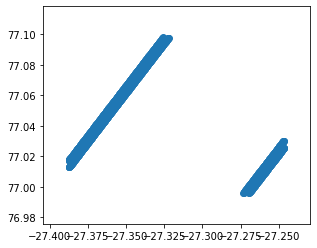

In [36]:
gdf.plot()

In [37]:
import georasters as grs
# Get the DEM
dem = grs.from_file(f'{dem_folder}/{dem_tif}')
def getPixVal(geom):
    #dem.map_pixel(x, y)
    coords = geom.coords[0]
    x, y = coords
    return(dem.map_pixel(x, y))

/home/yadav.111/anaconda3/lib/python3.7/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)


In [38]:
# proj4 = '+proj=stere +lat_0=-90 +lat_ts=-71 +lon_0=0 +k=1 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs' #rema 
# proj4 = '+proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +k=1 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs' #arcticDEM
# gdf = gdf.to_crs({'init': 'epsg:4326'}) #change to lat/longitude
proj4 = dem.projection.ExportToProj4() # but there is extra space at the end
gdf1 = gdf.to_crs(proj4) #Without projecting to same crs as DEM, cant extract elevation from dEM

gdf1['dem'] = gdf1.geometry.apply(getPixVal)
# gdf = gdf.iloc[6:-10]
gdf1['dif'] = gdf1.h_li - gdf1.dem

In [39]:
gdf1.head()

t_dt         h_li  q_flag strip  \
0  2019-04-11 21:25:12.877000  1868.345703       0  gt1l   
1  2019-04-11 21:25:12.880000  1868.483643       0  gt1l   
2  2019-04-11 21:25:12.882000  1868.565674       0  gt1l   
3  2019-04-11 21:25:12.885000  1868.641235       0  gt1l   
4  2019-04-11 21:25:12.888000  1868.670898       0  gt1l   

                          geometry          dem          dif  
0  POINT (430326.924 -1344053.075)  1853.955444    14.390259  
1  POINT (430329.615 -1344072.556)     0.000000  1868.483643  
2  POINT (430332.308 -1344092.021)  1854.229370    14.336304  
3  POINT (430335.006 -1344111.501)  1854.365967    14.275269  
4  POINT (430337.714 -1344130.971)  1854.165771    14.505127

In [40]:
# Try and Compare the same with Xarray

In [41]:
# These are edge of DEMs so basically no data
gdf2 = gdf1[gdf1.dem!=0] 

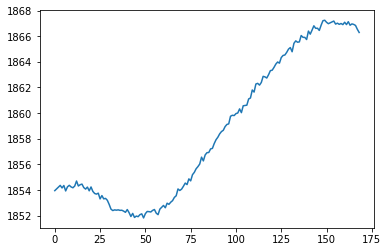

In [42]:
gdf2[gdf2.strip=='gt1l'].dem.plot();

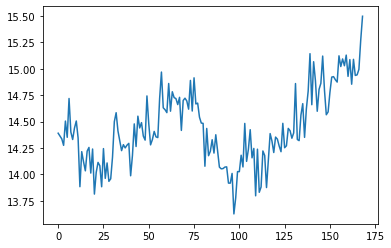

In [43]:
gdf2[gdf2.strip=='gt1l'].dif.plot();

In [44]:
gdf.crs, gdf1.crs

({'init': 'epsg:4326'},
 '+proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +k=1 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs ')

In [45]:
# use xarray only for visualization
da = xr.open_rasterio(f'{dem_folder}/{dem_tif}') #, chunks={'x':2**11, 'y':2**11}
da = da.load()
# da = xr.open_rasterio(f'{dem_folder}/{ortho_tif}')
nodata_value = da.attrs['nodatavals'][0]
da.data[da.data==nodata_value] = np.nan
print(nodata_value)

-9999.0


In [46]:
gdf1.iloc[1].geometry.x, gdf1.iloc[1].geometry.y

(430329.6152404891, -1344072.556204055)

In [47]:
# da.plot.imshow(cmap='gist_earth')

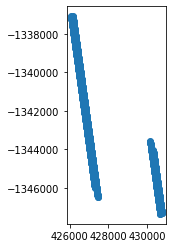

In [48]:
gdf1.plot();

In [49]:
# out = da.interp(x = gdf1.geometry.x, y=gdf1.geometry.y)

In [50]:
idx = 0
out = da.sel(x = gdf1.geometry.x[idx], y=gdf1.geometry.y[idx], method='nearest')
out

<xarray.DataArray (band: 1)>
array([1853.9554], dtype=float32)
Coordinates:
  * band     (band) int64 1
    y        float64 -1.344e+06
    x        float64 4.303e+05
Attributes:
    transform:      (2.0, 0.0, 424592.0, 0.0, -2.0, -1336572.0)
    crs:            +proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +k=1 +x_0=0 +...
    res:            (2.0, 2.0)
    is_tiled:       1
    nodatavals:     (-9999.0,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area

In [51]:
def getPixVal2(pt):
    #x, y = pt.coords[:][0]
    out = da.sel(x = pt.x, y=pt.y, method='nearest')
    return out.values[0]

In [52]:
pt = gdf1.geometry.iloc[0]
pt.x, pt.y

(430326.9235717995, -1344053.0750833421)

In [53]:
# da.sel(x = pt.x, y=pt.y, method='nearest')
# print(gdf1.geometry.iloc[0].)
# gdf1.iloc[0].geometry.xy
# x, y = pt.coords[:][0]

In [54]:
pt = gdf1.geometry.iloc[0].xy
type(pt)

tuple

In [55]:
gdf1.crs, da.attrs

('+proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +k=1 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs ',
 {'transform': (2.0, 0.0, 424592.0, 0.0, -2.0, -1336572.0),
  'crs': '+proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +k=1 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs=True',
  'res': (2.0, 2.0),
  'is_tiled': 1,
  'nodatavals': (-9999.0,),
  'scales': (1.0,),
  'offsets': (0.0,),
  'AREA_OR_POINT': 'Area'})

In [57]:
gdf1['dem_x'] = gdf1.geometry.apply(getPixVal2)

In [58]:
(gdf1.dem - gdf1.dem_x).min(), (gdf1.dem - gdf1.dem_x).max()

(0.0, 0.0)

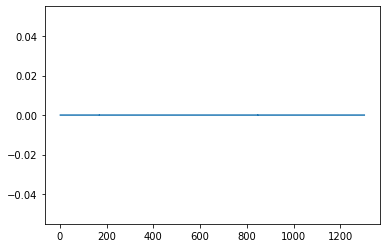

In [59]:
(gdf1.dem - gdf1.dem_x).plot()

In [60]:
gdf1[gdf1.strip=='gt1l'][['dem','dem_x']].hvplot(kind='scatter', alpha=.5)

:NdOverlay   [Variable]
   :Scatter   [index]   (value)

In [61]:
# There are some points on the margins of DEM that has zero value (if extracted from georasters), or NAN if extracted from XARRAY
# gdf1[gdf1.strip=='gt1l'].tail(20)
outside = gdf1[gdf1.dem==0]
outside

t_dt         h_li  q_flag strip  \
1     2019-04-11 21:25:12.880000  1868.483643       0  gt1l   
169   2019-04-11 21:25:13.151000  1859.426514       0  gt1r   
846   2019-04-11 21:25:13.147000  1858.998413       0  gt2l   
847   2019-04-11 21:25:12.134000  1799.738647       0  gt2r   
1303  2019-04-11 21:25:13.419000  1855.783203       0  gt2r   
1304  2019-04-11 21:25:13.422000  1855.871094       0  gt2r   

                             geometry  dem          dif  dem_x  
1     POINT (430329.615 -1344072.556)  0.0  1868.483643    NaN  
169   POINT (430170.495 -1343578.605)  0.0  1859.426514    NaN  
846   POINT (427450.980 -1346474.922)  0.0  1858.998413    NaN  
847   POINT (426064.744 -1337102.489)  0.0  1799.738647    NaN  
1303  POINT (427293.818 -1345980.711)  0.0  1855.783203    NaN  
1304  POINT (427296.520 -1346000.189)  0.0  1855.871094    NaN

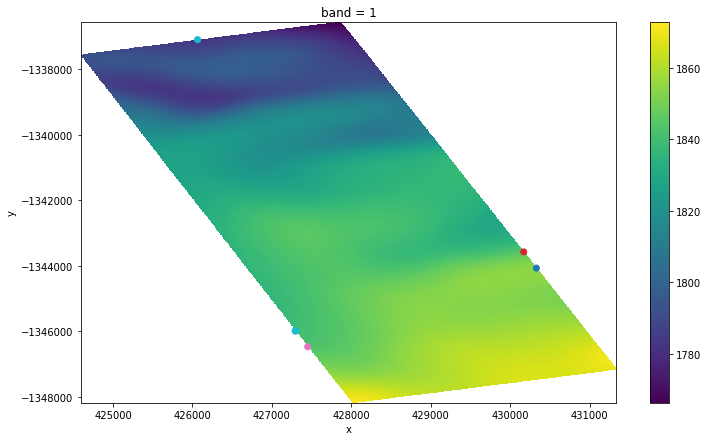

In [62]:
ax = outside.plot(column='strip', figsize=(12,7))
da.sel(band=1).plot.imshow(ax=ax);

In [63]:
# gdf1.dif.plot(kind='hist', bins=100)
gdf1[gdf1.strip=='gt1l'][['dem', 'dem_x']].iloc[:4000]#.plot(kind='scatter', x=0, y=1);

dem        dem_x
0    1853.955444  1853.955444
1       0.000000          NaN
2    1854.229370  1854.229370
3    1854.365967  1854.365967
4    1854.165771  1854.165771
..           ...          ...
164  1866.960449  1866.960449
165  1866.919922  1866.919922
166  1866.839233  1866.839233
167  1866.539429  1866.539429
168  1866.291992  1866.291992

[169 rows x 2 columns]

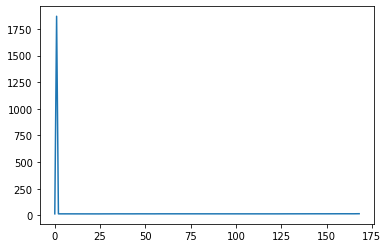

In [64]:
# (gdf1.h_li - gdf1.dem)
(gdf1.h_li - gdf1.dem)[gdf1.strip=='gt1l'].plot()

In [65]:
len(gdf1)

1305

In [66]:
# Drop the values from edges of DEM
gdf1 = gdf1.dropna()

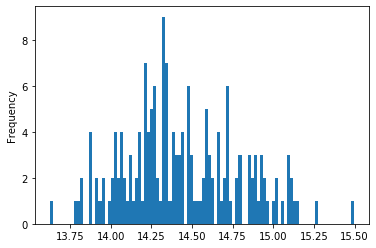

In [67]:
(gdf1.h_li - gdf1.dem_x)[gdf1.strip=='gt1l'].plot(kind='hist', bins=100);

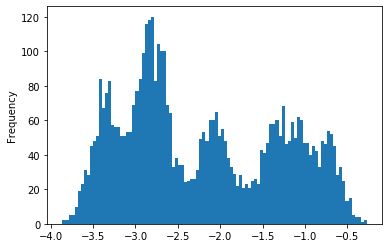

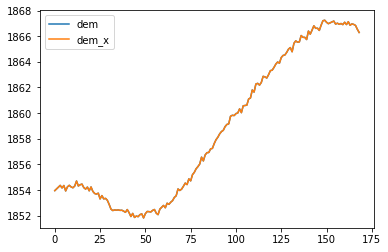

In [68]:
gdf1[gdf1.strip=='gt1l'][['dem', 'dem_x']].plot(subplots=False);

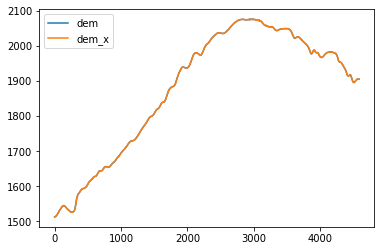

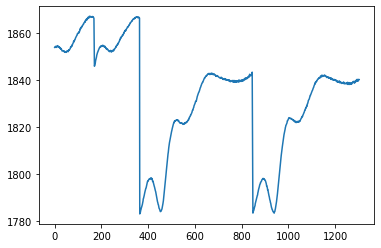

In [69]:
gdf1.dem_x.plot()

In [70]:
len(gdf1[np.isnan(gdf1.dem_x)])/len(gdf1)

0.0

In [71]:
gdf1.geometry.x.iloc[0], gdf1.geometry.y.iloc[0]

(430326.9235717995, -1344053.0750833421)

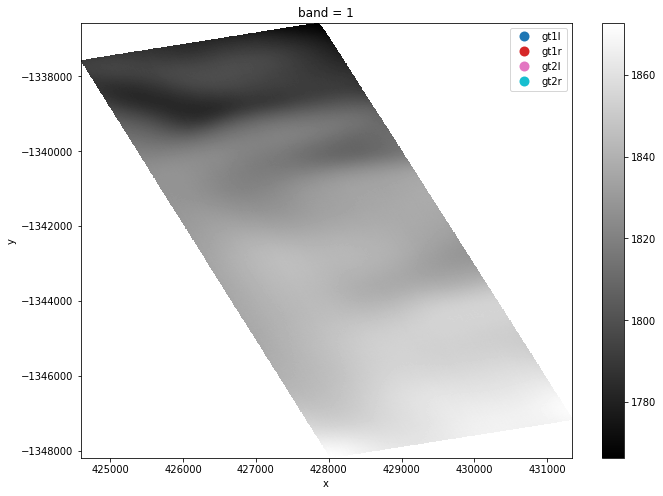

In [73]:
# To plot icesat and dem together, convert to common coordinate system
proj4 = '+proj=stere +lat_0=-90 +lat_ts=-71 +lon_0=0 +k=1 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs' #rema 
# gdf_proj = gdf.to_crs(proj4)
ax = gdf_proj.plot(column='strip', legend=True, figsize=(11, 8))
da.sel(band=1).plot.imshow(ax=ax, cmap='gray');

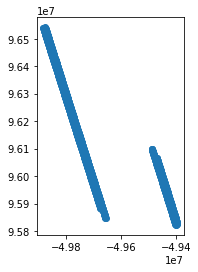

In [75]:
gdf_proj.plot()

In [76]:
# gdf2

In [77]:
gdf2 = gdf2.reset_index(drop = True)

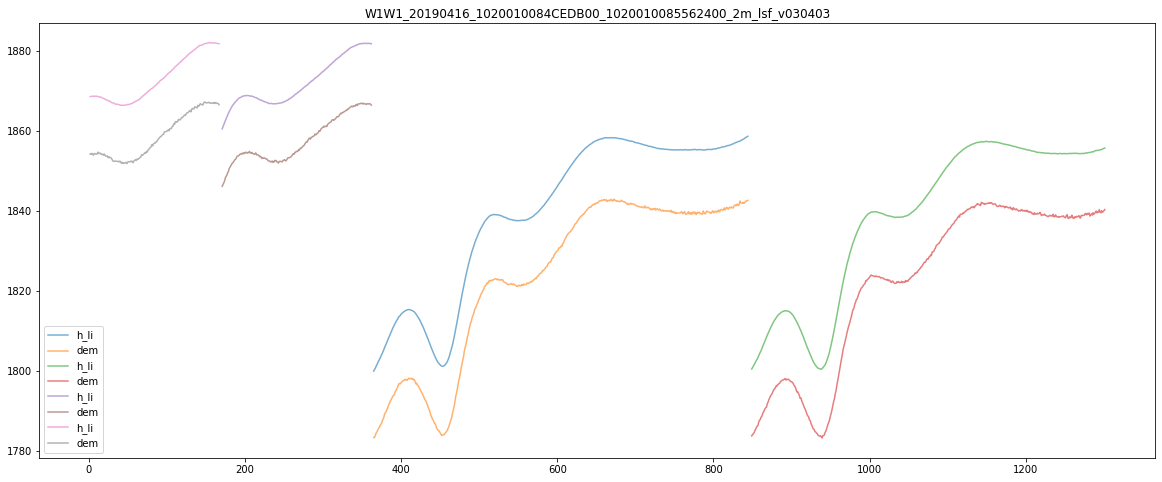

In [78]:
gtls = list(gdf2.strip.value_counts().index) #['gt1l', 'gt1r','gt2l', 'gt2r', 'gt3l','gt3r']
# gtl = gtls[2]
fig, ax = plt.subplots(figsize=(20, 8))
for gtl in gtls:
    gdf1[gdf1.strip==gtl][['h_li', 'dem']].iloc[1:-1].plot(style='-', alpha=.6, title=strip, ax=ax);

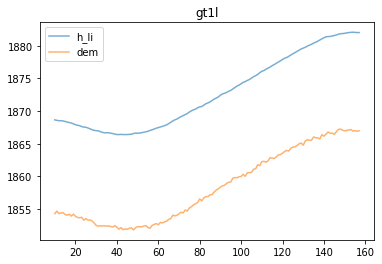

In [79]:
gdf1[gdf1.strip=='gt1l'].reset_index()[['h_li', 'dem']].iloc[10:-10].plot(style='-', alpha=.6, title=gtl);

In [80]:
# len(gtls)
gtls

['gt2l', 'gt2r', 'gt1r', 'gt1l']

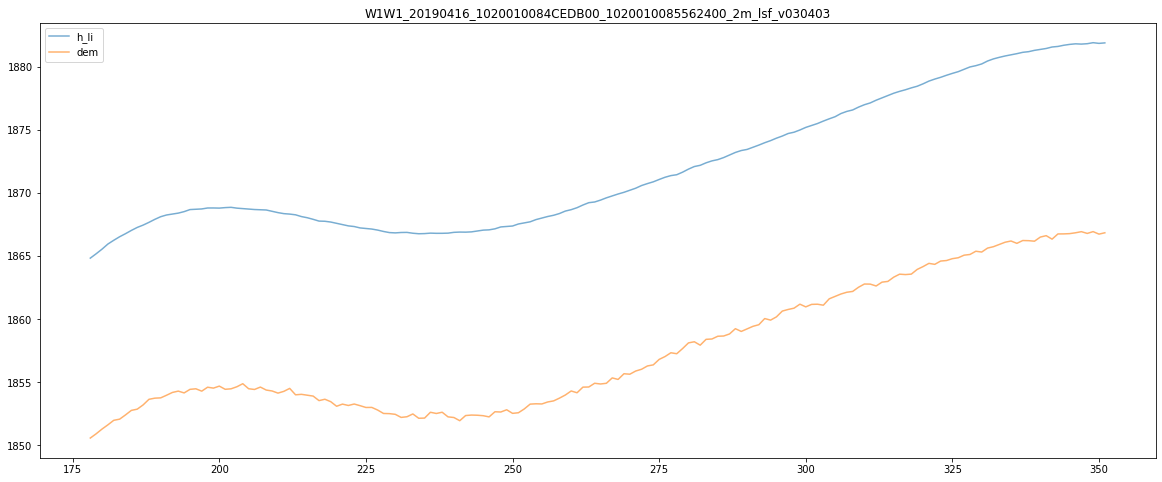

In [81]:
# gdf[['h_li', 'dem']].plot()
fig, ax = plt.subplots(figsize=(20, 8))
# gdf2[gdf2.strip=='gt1l'][['h_li', 'dem']].reset_index(drop=True).iloc[10:-10].plot(style='-', alpha=.6, title=strip, ax=ax); #, ax=ax
gdf2[gdf2.strip=='gt1r'][['h_li', 'dem']].iloc[10:-10].plot(style='-', alpha=.6, title=strip, ax=ax); #, ax=ax

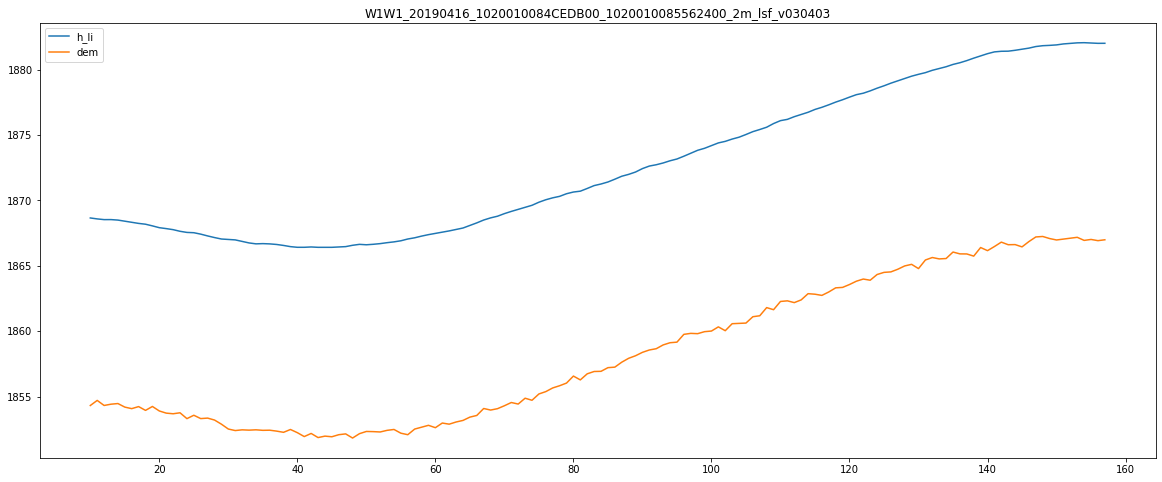

In [82]:
fig, ax = plt.subplots(figsize=(20, 8))
gdf2[gdf2.strip=='gt1l'][['h_li', 'dem']].reset_index(drop=True).iloc[10:-10].plot(style='-', title=strip, ax=ax); #, ax=ax
# gdf[gdf.strip=='gt1r'][['h_li', 'dem']].reset_index(drop=True).iloc[10:-10].plot(style='-', alpha=.6, title=strip, ax=ax); #, ax=ax

In [83]:
# gdf0[gdf0.strip=='gt1l'].reset_index(drop=True)

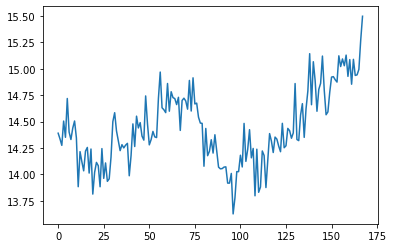

In [84]:
gdf2[gdf2.strip=='gt1l'].dif.plot();

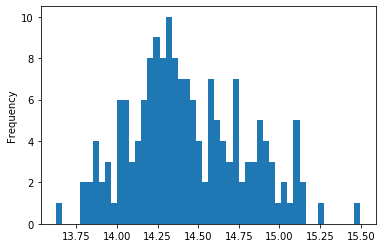

In [85]:
gdf2[gdf2.strip=='gt1l'].dif.plot(kind='hist', bins=50);

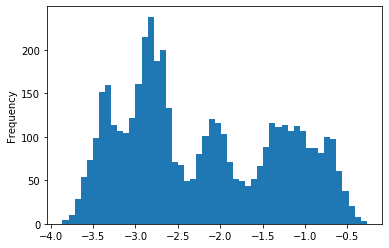

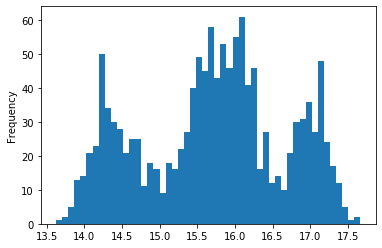

In [86]:
gdf2.dif.plot(kind='hist', bins=50);

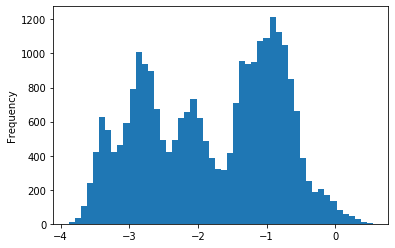

In [87]:
gdf2.dif.mean()

15.705274339636258

In [88]:
dfg = gdf2.groupby('strip')
dfg

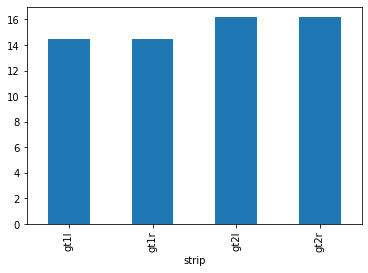

In [89]:
dfg.dif.mean().plot(kind='bar');

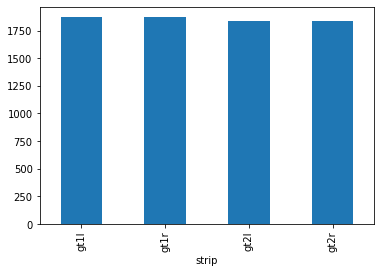

In [90]:
dfg.h_li.mean().plot(kind='bar');

In [91]:
gdf2.strip.value_counts()

gt2l    482
gt2r    455
gt1r    194
gt1l    168
Name: strip, dtype: int64

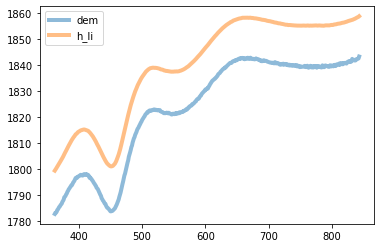

In [92]:
gtl = 'gt2'
ax = gdf2[gdf2.strip==f'{gtl}l'][['dem','h_li']].plot(lw=4, alpha=.5)
# gdf2[gdf2.strip==f'{gtl}r'][['h_li', 'dem']].plot(ax = ax)

In [93]:
#Make dataframe for plotting using hvplot
df2 = pd.DataFrame(gdf1)

In [94]:
gdf1

t_dt         h_li  q_flag strip  \
0     2019-04-11 21:25:12.877000  1868.345703       0  gt1l   
2     2019-04-11 21:25:12.882000  1868.565674       0  gt1l   
3     2019-04-11 21:25:12.885000  1868.641235       0  gt1l   
4     2019-04-11 21:25:12.888000  1868.670898       0  gt1l   
5     2019-04-11 21:25:12.891000  1868.706299       0  gt1l   
...                          ...          ...     ...   ...   
1298  2019-04-11 21:25:13.405000  1855.435669       0  gt2r   
1299  2019-04-11 21:25:13.408000  1855.572510       0  gt2r   
1300  2019-04-11 21:25:13.411000  1855.650391       0  gt2r   
1301  2019-04-11 21:25:13.414000  1855.718018       0  gt2r   
1302  2019-04-11 21:25:13.416000  1855.763794       0  gt2r   

                             geometry          dem        dif        dem_x  
0     POINT (430326.924 -1344053.075)  1853.955444  14.390259  1853.955444  
2     POINT (430332.308 -1344092.021)  1854.229370  14.336304  1854.229370  
3     POINT (430335.006 -1344111.501)  1854.365967  14.275269  1854.365967  
4     POINT (430337.714 -1344130.971)  1854.165771  14.505127  1854.165771  
5     POINT (430340.440 -1344150.431)  1854.354858  14.351440  1854.354858  
...                               ...          ...        ...          ...  
1298  POINT (427280.296 -1345883.360)  1839.685547  15.750122  1839.685547  
1299  POINT (427283.012 -1345902.836)  1839.824951  15.747559  1839.824951  
1300  POINT (427285.717 -1345922.300)  1840.060669  15.589722  1840.060669  
1301  POINT (427288.418 -1345941.778)  1840.354614  15.363403  1840.354614  
1302  POINT (427291.118 -1345961.249)  1840.219116  15.544678  1840.219116  

[1299 rows x 8 columns]

In [96]:
df2.strip.value_counts()

gt2l    482
gt2r    455
gt1r    194
gt1l    168
Name: strip, dtype: int64

In [100]:
df2[df2.strip=='gt2l']
# df2[df2.strip=='gt2l'].hvplot(x='lon', y='h_li', kind='scatter', height=450, width=700, s=5, alpha=.9)

t_dt         h_li  q_flag strip  \
364  2019-04-11 21:25:11.789000  1799.547852       0  gt2l   
365  2019-04-11 21:25:11.791000  1799.957397       0  gt2l   
366  2019-04-11 21:25:11.794000  1800.305176       0  gt2l   
367  2019-04-11 21:25:11.797000  1800.687256       0  gt2l   
368  2019-04-11 21:25:11.800000  1801.118286       0  gt2l   
..                          ...          ...     ...   ...   
841  2019-04-11 21:25:13.133000  1858.312012       0  gt2l   
842  2019-04-11 21:25:13.136000  1858.437134       0  gt2l   
843  2019-04-11 21:25:13.139000  1858.545898       0  gt2l   
844  2019-04-11 21:25:13.142000  1858.670166       0  gt2l   
845  2019-04-11 21:25:13.145000  1858.878906       0  gt2l   

                            geometry          dem        dif        dem_x  
364  POINT (426150.751 -1337090.262)  1782.910522  16.637329  1782.910522  
365  POINT (426153.509 -1337110.026)  1783.366089  16.591309  1783.366089  
366  POINT (426156.258 -1337129.487)  1783.386475  16.918701  1783.386475  
367  POINT (426159.000 -1337148.769)  1783.769531  16.917725  1783.769531  
368  POINT (426161.772 -1337168.182)  1784.441040  16.677246  1784.441040  
..                               ...          ...        ...          ...  
841  POINT (427437.517 -1346377.563)  1842.417358  15.894653  1842.417358  
842  POINT (427440.177 -1346397.048)  1842.411255  16.025879  1842.411255  
843  POINT (427442.848 -1346416.514)  1842.596436  15.949463  1842.596436  
844  POINT (427445.539 -1346435.993)  1842.639893  16.030273  1842.639893  
845  POINT (427448.250 -1346455.463)  1843.392212  15.486694  1843.392212  

[482 rows x 8 columns]

In [95]:
first = df2[df2.strip=='gt2l'].hvplot(x='lon', y='h_li', kind='scatter', height=450, width=700, s=5, alpha=.9)
second = df2[df2.strip=='gt2r'].hvplot(x='lon', y='dem', kind='scatter', height=450, width=700, s=1, alpha=.9, ylim=(1400, 2200))# ylim=(1200, 2200) 
first * second

DataError: Supplied data does not contain specified dimensions, the following dimensions were not found: ['lon']

PandasInterface expects tabular data, for more information on supported datatypes see http://holoviews.org/user_guide/Tabular_Datasets.html

In [81]:
bounds = (1400, 2200)

In [82]:
# one = df2[df2.strip.isin(['gt1l', 'gt1r'])].hvplot(x='lon', y='h_li', kind='scatter', height=450, width=900, s=5, alpha=.9, by='strip') 
a1 = df2[df2.strip=='gt2l'].hvplot(x='lon', y='h_li', kind='scatter', height=450, width=800, s=30, alpha=.5, ylim=bounds).relabel('ATL06')
a2 = df2[df2.strip=='gt2l'].hvplot(x='lon', y='dem', kind='scatter', height=450, width=800, s=1, alpha=.9, ylim=bounds, ylabel='Elevation (meter)', xlabel='Longitude').relabel('DEM')
a1*a2 #+ a3*a4


:Overlay
   .Scatter.ATL06 :Scatter   [lon]   (h_li)
   .Scatter.DEM   :Scatter   [lon]   (dem)

In [83]:
a3 = df2[df2.strip=='gt2r'].hvplot(x='lon', y='h_li', kind='scatter', height=450, width=800, s=40, alpha=.5, ylim=bounds).relabel('ATL06')
a4 = df2[df2.strip=='gt2r'].hvplot(x='lon', y='dem', kind='scatter', height=350, width=800, s=1, alpha=.9, ylim=bounds, ylabel='Elevation (meter)', xlabel='Longitude').relabel('DEM')
a3*a4

:Overlay
   .Scatter.ATL06 :Scatter   [lon]   (h_li)
   .Scatter.DEM   :Scatter   [lon]   (dem)

In [84]:
df2[df2.strip=='gt2r'].hvplot(x='lon', y='dif', kind='scatter', height=200, width=700, s=.15,  ylim=(-4,3), ylabel='meter', xlabel='Longitude')#.relabel('Elevation Difference') #title='Elevation Difference between ATL06 and REMA'

:Scatter   [lon]   (dif)

In [85]:
gdf2.dif.std()

0.9702196892382353

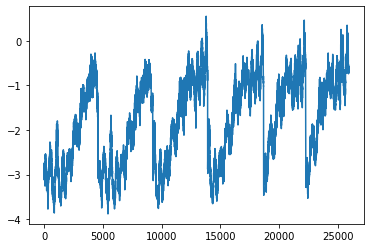

In [86]:
gdf2.dif.plot()

In [87]:
a1*a2 + a3*a4

:Layout
   .Overlay.I  :Overlay
      .Scatter.ATL06 :Scatter   [lon]   (h_li)
      .Scatter.DEM   :Scatter   [lon]   (dem)
   .Overlay.II :Overlay
      .Scatter.ATL06 :Scatter   [lon]   (h_li)
      .Scatter.DEM   :Scatter   [lon]   (dem)

In [88]:
first = df2[df2.strip.isin(['gt1l', 'gt1r'])].hvplot(x='lon', y='h_li', kind='scatter', height=450, width=900, s=5, alpha=.9, by='strip') 
second = df2[df2.strip.isin(['gt1l', 'gt1r'])].hvplot(x='lon', y='dem', kind='scatter', height=450, width=900, s=1, alpha=.9, by='strip', ylim=(1400, 2200))# ylim=(1200, 2200) 
first * second

:Overlay
   .NdOverlay.I  :NdOverlay   [strip]
      :Scatter   [lon]   (h_li)
   .NdOverlay.II :NdOverlay   [strip]
      :Scatter   [lon]   (dem)

In [89]:
df2[df2.strip.isin(['gt1l', 'gt1r'])]

t_dt         h_li  q_flag strip  \
0     2018-12-14 17:39:53.352000  1508.878784       0  gt1l   
1     2018-12-14 17:39:53.354000  1508.894043       0  gt1l   
2     2018-12-14 17:39:53.357000  1508.947998       0  gt1l   
3     2018-12-14 17:39:53.360000  1509.036133       0  gt1l   
4     2018-12-14 17:39:53.363000  1509.118652       0  gt1l   
...                          ...          ...     ...   ...   
9255  2018-12-14 17:40:06.842000  1898.252197       0  gt1r   
9256  2018-12-14 17:40:06.845000  1898.076538       0  gt1r   
9257  2018-12-14 17:40:06.847000  1897.864746       0  gt1r   
9258  2018-12-14 17:40:06.850000  1897.681274       0  gt1r   
9259  2018-12-14 17:40:06.853000  1897.478516       0  gt1r   

                         geometry          dem          dif        lon  \
0     POINT (-67.70233 -75.00694)  1511.755859    -2.877075 -67.702333   
1     POINT (-67.70243 -75.00677)  1511.888428    -2.994385 -67.702434   
2     POINT (-67.70253 -75.00659)  1511.749512    -2.801514 -67.702535   
3     POINT (-67.70264 -75.00641)  1511.958618    -2.922485 -67.702635   
4     POINT (-67.70274 -75.00624)  1511.996216    -2.877563 -67.702736   
...                           ...          ...          ...        ...   
9255  POINT (-68.16014 -74.18507)     0.000000  1898.252197 -68.160140   
9256  POINT (-68.16024 -74.18489)     0.000000  1898.076538 -68.160235   
9257  POINT (-68.16033 -74.18472)     0.000000  1897.864746 -68.160329   
9258  POINT (-68.16042 -74.18454)     0.000000  1897.681274 -68.160422   
9259  POINT (-68.16052 -74.18436)     0.000000  1897.478516 -68.160515   

            lat  dem_x  
0    -75.006944    NaN  
1    -75.006768    NaN  
2    -75.006591    NaN  
3    -75.006415    NaN  
4    -75.006238    NaN  
...         ...    ...  
9255 -74.185069    NaN  
9256 -74.184892    NaN  
9257 -74.184716    NaN  
9258 -74.184539    NaN  
9259 -74.184363    NaN  

[9260 rows x 10 columns]

In [90]:
first = df2.hvplot(y='lon', x='h_li', kind='scatter', width=350, height=600, by='strip', s=5, alpha=.9, xlabel='meters', subplots=True) 
second = df2.hvplot(y='lon', x='dem', kind='scatter', width=350, height=600, by='strip', s=5, alpha=.9, xlabel='meters', subplots=True) 
first * second

:NdLayout   [strip]
   :Overlay
      .Scatter.I  :Scatter   [h_li]   (lon)
      .Scatter.II :Scatter   [dem]   (lon)

In [91]:
third = df2.hvplot(y='lat', x='h_li', kind='scatter', width=350, height=600, by='strip', s=5, alpha=.9, xlabel='meters', subplots=True) 
fourth = df2.hvplot(y='lat', x='dem', kind='scatter', width=350, height=600, by='strip', s=5, alpha=.9, xlabel='meters', subplots=True) 
third * fourth

:NdLayout   [strip]
   :Overlay
      .Scatter.I  :Scatter   [h_li]   (lat)
      .Scatter.II :Scatter   [dem]   (lat)

In [92]:
df2.hvplot(y='lon', x='dem', kind='scatter', width=350, height=600, by='strip', s=5, alpha=.9, xlabel='meters', subplots=True)

:NdLayout   [strip]
   :Scatter   [dem]   (lon)

In [93]:
df2.hvplot(y='h_li')

:Curve   [index]   (h_li)

In [94]:
# df2 = gdf2.drop('geometry', axis=1)

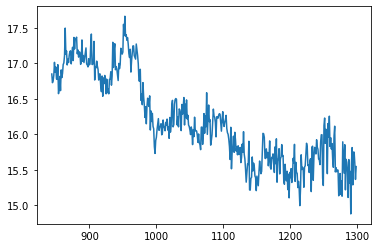

In [101]:
gdf2[gdf2.strip==f'{gtl}r'].dif.plot()

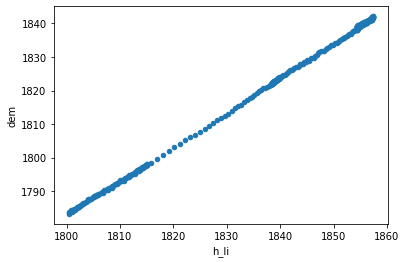

In [102]:
gdf2[gdf2.strip==f'{gtl}r'][['h_li', 'dem']].iloc[2:-10].plot(kind='scatter', x=0, y=1)